In [37]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons

In [38]:
# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [39]:
# Generate simple dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=0)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [40]:
# Simple neural network
class SimpleNet(nn.Module):
    def __init__(self, activation):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)
        self.activation = activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.sigmoid(self.fc2(x))

        return x

In [41]:
activations = {"Sigmoid": nn.Sigmoid(), "Tanh": nn.Tanh(), "ReLU": nn.ReLU()}

In [42]:
models = {}
optimizers = {}
loss_histories = {}
acc_histories = {}

In [43]:
for name, activation in activations.items():
    models[name] = SimpleNet(activation)
    optimizers[name] = optim.Adam(models[name].parameters(), lr=0.01)
    loss_histories[name] = []
    acc_histories[name] = []

In [ ]:
epochs = 200
criterion = nn.MSELoss()

In [45]:
# Training loop
for epoch in range(epochs):
    for name in activations.keys():
        # Forward pass
        outputs = models[name](X_tensor)
        loss = criterion(outputs, y_tensor)

        # Backward pass
        optimizers[name].zero_grad()
        loss.backward()
        optimizers[name].step()

        # Track metrics
        loss_histories[name].append(loss.item())
        preds = (outputs >= 0.5).float()
        acc = (preds == y_tensor).float().mean().item()
        acc_histories[name].append(acc)

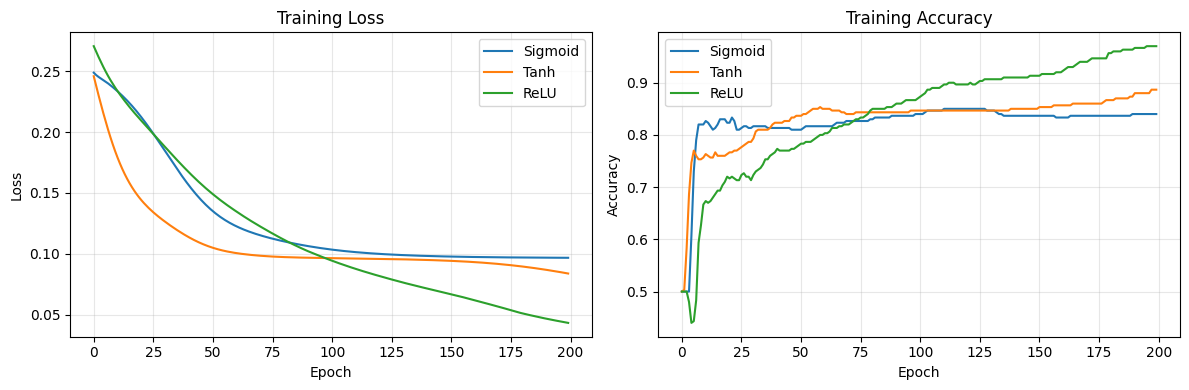

In [46]:
# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

for name in activations.keys():
    plt.plot(loss_histories[name], label=name)

plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)

for name in activations.keys():
    plt.plot(acc_histories[name], label=name)

plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("./static/comparison.png", dpi=300)
plt.show()

In [47]:
print("Final Results:")

for name in activations.keys():
    final_acc = acc_histories[name][-1]
    final_loss = loss_histories[name][-1]

    print(f"{name}: Loss = {final_loss:.4f}, Accuracy = {final_acc:.4f}")

Final Results:
Sigmoid: Loss = 0.0968, Accuracy = 0.8400
Tanh: Loss = 0.0840, Accuracy = 0.8867
ReLU: Loss = 0.0435, Accuracy = 0.9700
